In [3]:
# Kütüphaneleri import etme
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Veri setini yükleme
file_path = '/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv'
data = pd.read_csv(file_path)

# Orijinal veri setinin ilk birkaç satırını getirme
print("Orijinal Veri Seti:")
print(data.head())

# Orijinal veri setinin genel bilgileri
print("\nOrijinal Veri Seti Bilgileri:")
print(data.info())

# Random NaN değerler eklemek için fonksiyon
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame."""
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

# Eksiklik oranını belirleme ve NaN değerler ekleme
missing_rate = 0.05  # %5 eksiklik oranı
data_with_nan = add_random_missing_values(data, missing_rate=missing_rate)

# Bozulmuş veri setinin genel bilgileri
print("\nEksikliklerin Eklendiği Veri Seti Bilgileri:")
print(data_with_nan.info())

# Bozulmuş veri setinin ilk birkaç satırını getirme
print("\nEksikliklerin Eklendiği Veri Seti:")
print(data_with_nan.head())

# Bozulmuş veri setini kaydetme
data_with_nan.to_csv('stellar_classification_with_nan.csv', index=False)


Orijinal Veri Seti:
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171 

# Eksik Değer Analizi

Eksik Değerlerin Sayısı:
 obj_ID         4858
alpha          4999
delta          4847
u              4889
g              4883
r              4918
i              4851
z              4998
run_ID         4850
rerun_ID       4799
cam_col        4929
field_ID       4797
spec_obj_ID    4838
class          4789
redshift       4867
plate          4918
MJD            4883
fiber_ID       4869
dtype: int64

Eksik Değerlerin Oranı (%):
 obj_ID         4.858
alpha          4.999
delta          4.847
u              4.889
g              4.883
r              4.918
i              4.851
z              4.998
run_ID         4.850
rerun_ID       4.799
cam_col        4.929
field_ID       4.797
spec_obj_ID    4.838
class          4.789
redshift       4.867
plate          4.918
MJD            4.883
fiber_ID       4.869
dtype: float64


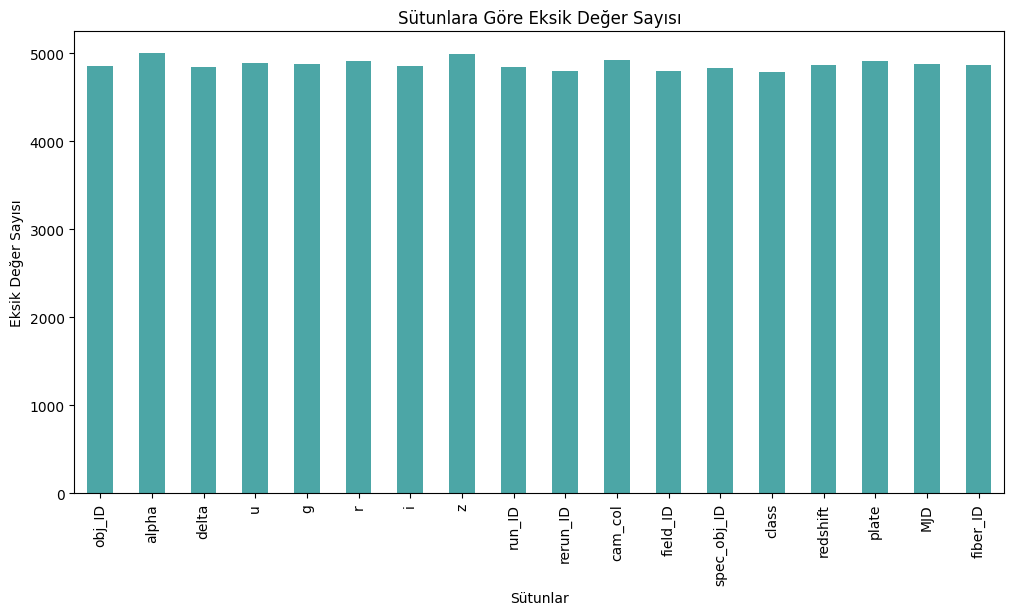

In [4]:
# Eksik değerlerin sütunlara göre sayısı
missing_counts = data_with_nan.isnull().sum()
print("Eksik Değerlerin Sayısı:\n", missing_counts)

# Eksik değerlerin oranı
missing_ratio = data_with_nan.isnull().mean() * 100
print("\nEksik Değerlerin Oranı (%):\n", missing_ratio)

# Eksik değerlerin sütunlara göre görselleştirilmesi
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Sütunlara Göre Eksik Değer Sayısı')
plt.xlabel('Sütunlar')
plt.ylabel('Eksik Değer Sayısı')
plt.show()


# Eksik Değerlerin İmputasyonu

In [6]:
# Sayısal sütunlardaki eksik değerleri sütunların ortalamasıyla doldurma
numeric_columns = data_with_nan.select_dtypes(include=['float64', 'int64']).columns
data_with_nan[numeric_columns] = data_with_nan[numeric_columns].fillna(data_with_nan[numeric_columns].mean())

# Kategorik sütunlardaki eksik değerleri mod ile doldurma
categorical_columns = data_with_nan.select_dtypes(include=['object']).columns
data_with_nan[categorical_columns] = data_with_nan[categorical_columns].fillna(data_with_nan[categorical_columns].mode().iloc[0])


# Eksik Değerlerin EDA Sürecine Etkisi

In [7]:
# Eksik değer doldurulduktan sonra veri setinin genel özellikleri
print("Eksik Değerler Doldurulduktan Sonra Veri Seti:")
print(data_with_nan.info())

# Belirli sütunlar için ortalama değer karşılaştırması
for col in ['u', 'g', 'r']:
    print(f"Sütun: {col}")
    print(f"Orijinal Ortalama: {data[col].mean():.2f}")
    print(f"Doldurulmuş Ortalama: {data_with_nan[col].mean():.2f}\n")


Eksik Değerler Doldurulduktan Sonra Veri Seti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  float64
 9   rerun_ID     100000 non-null  float64
 10  cam_col      100000 non-null  float64
 11  field_ID     100000 non-null  float64
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  float64
 16  MJD          100000 non-null  float64
 17  fiber_ID     100000 n

# EDA için Hazırlık Aşamaları

In [8]:
# Veri setini yükleme
df = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

# Eksik değerleri doldurma
df_cleaned = df.fillna(df.mean(numeric_only=True))
df_cleaned['class'] = df_cleaned['class'].fillna(df['class'].mode()[0])


In [9]:
# Veri setinin genel özet bilgisi
print(df_cleaned.info())

print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## Sayısal Sütun İstatistikleri

In [10]:
# Sayısal sütunlar için temel istatistikler
print(df_cleaned.describe())


             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

## Sınıf Dağılımı

In [11]:
# Sınıf dağılımı
print(df_cleaned['class'].value_counts())


class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


# Korelasyon Analizi

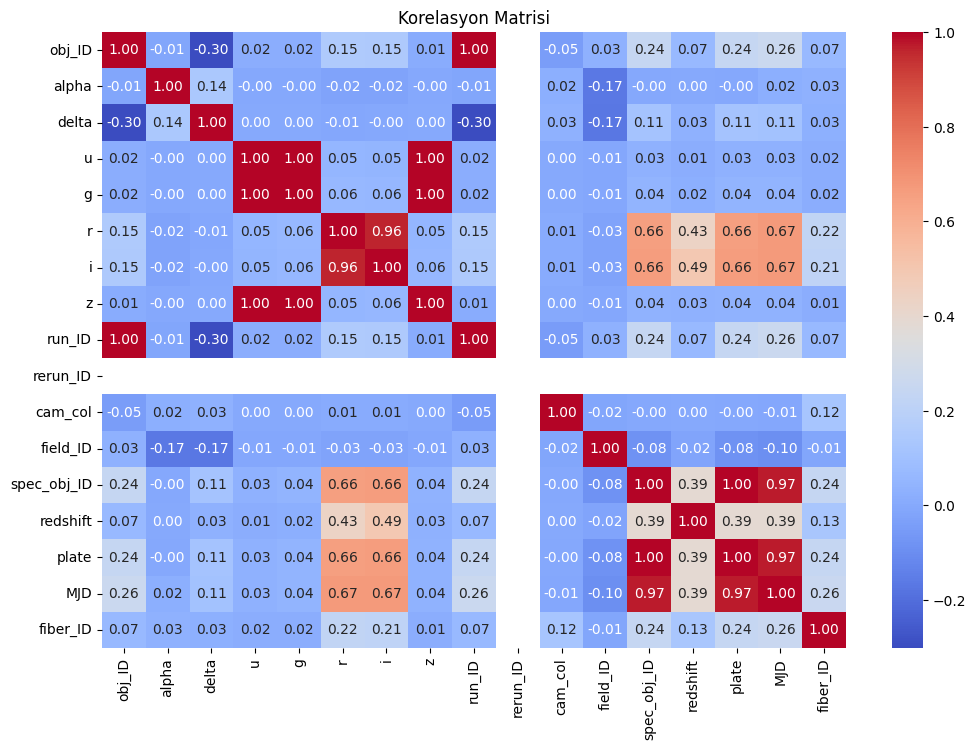

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_cleaned.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()


## Sınıf Dağılımı Grafiği

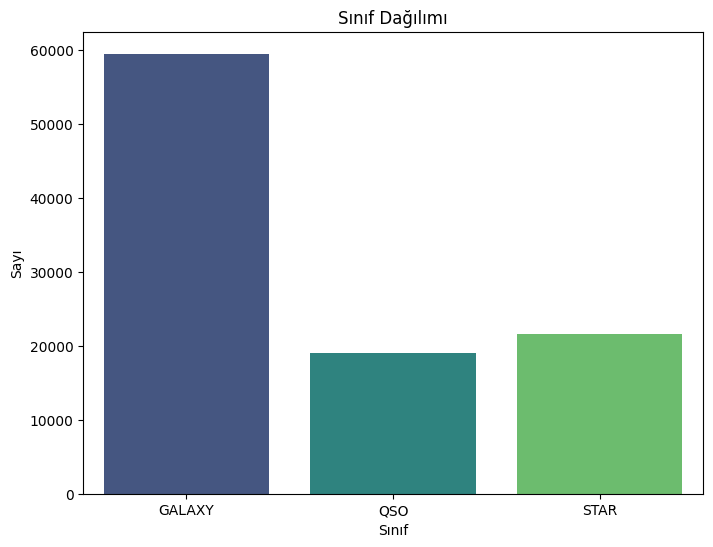

In [14]:
# Sınıf dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='class', palette='viridis')
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Sayı')
plt.show()


# Sayısal Değişkenler Arasındaki İlişki

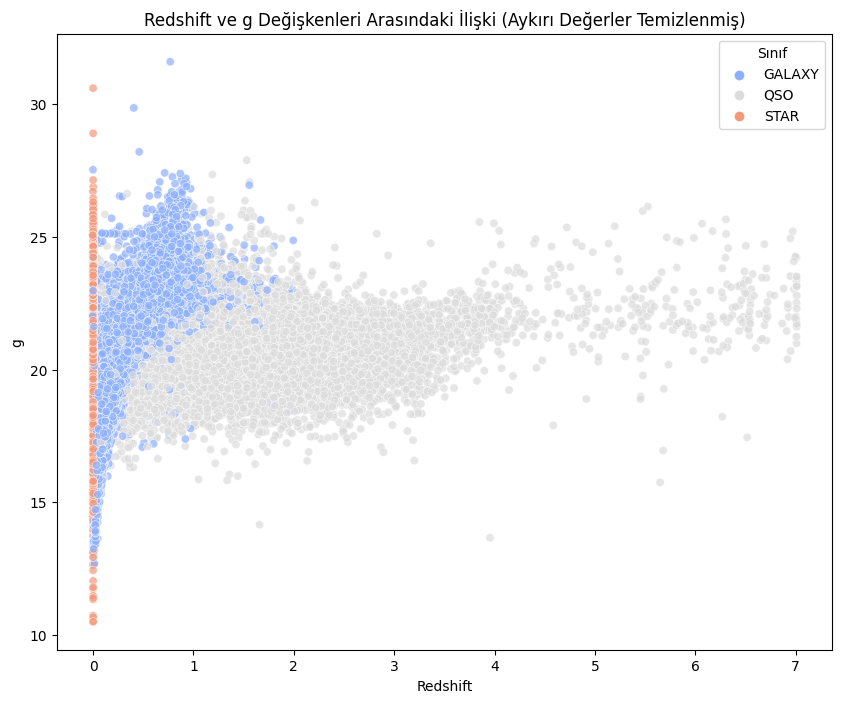

In [16]:
# Aykırı değerleri filtreleme
df_cleaned_filtered = df_cleaned[df_cleaned['g'] > 0]

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cleaned_filtered, x='redshift', y='g', hue='class', alpha=0.7, palette='coolwarm')
plt.title('Redshift ve g Değişkenleri Arasındaki İlişki (Aykırı Değerler Temizlenmiş)')
plt.xlabel('Redshift')
plt.ylabel('g')
plt.legend(title='Sınıf', loc='upper right')
plt.show()


# Histogram ile Redshift Dağılımı

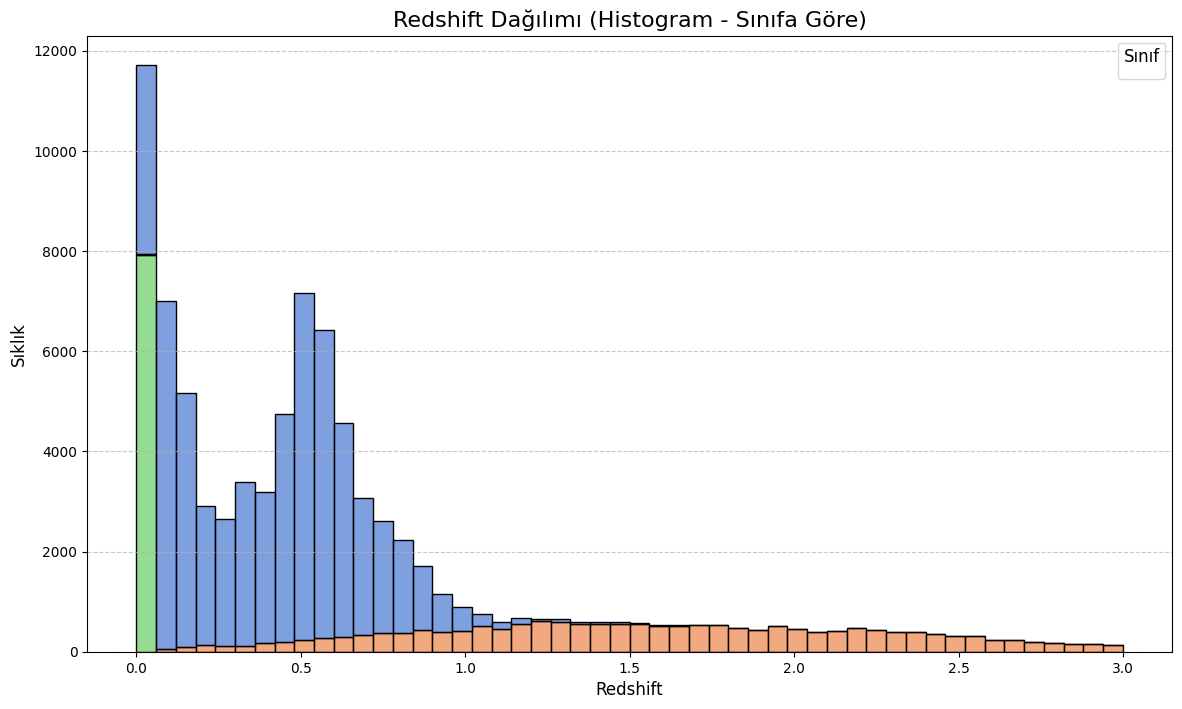

In [20]:
# Histogram ile dağılım
plt.figure(figsize=(14, 8))
sns.histplot(data=df_filtered, x="redshift", hue="class", multiple="stack", bins=50, palette="muted", alpha=0.7)
plt.title('Redshift Dağılımı (Histogram - Sınıfa Göre)', fontsize=16)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Sıklık', fontsize=12)
plt.legend(title='Sınıf', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [22]:

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

desc_stats = df_cleaned[numerical_columns].describe().transpose()

# Mod, Çarpıklık, Basıklık
desc_stats['mode'] = df_cleaned[numerical_columns].mode().iloc[0]
desc_stats['skew'] = df_cleaned[numerical_columns].skew()
desc_stats['kurt'] = df_cleaned[numerical_columns].kurt()

desc_stats


,count,mean,std,min,25%,50%,75%,max,mode,skew,kurt
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18,1.237659e+18,0.398727,-0.606168
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02,3.474960e+01,-0.028511,-0.537191
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01,-6.019312e-01,0.175079,-1.043062
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01,2.463465e+01,-313.849242,98998.365157
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01,2.511438e+01,-314.276695,99178.147344
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01,2.480203e+01,-0.507858,-0.376158
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01,2.436180e+01,-0.404167,-0.234844
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01,2.282690e+01,-314.759419,99381.345243
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03,3.699000e+03,0.398711,-0.606169
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,0.000000,0.000000


# Histogram ile Değişken Dağılımı

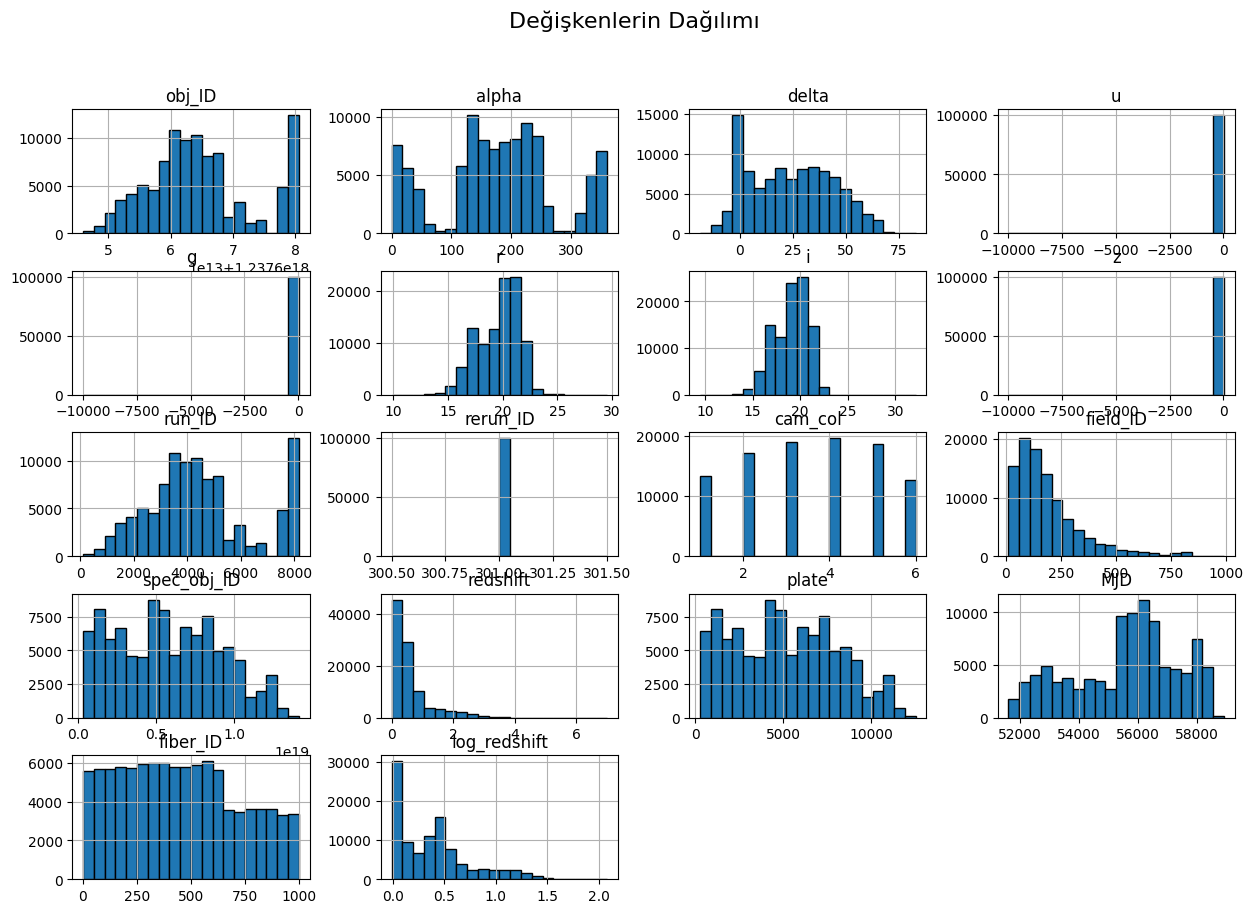

In [24]:
# Histogram
df_cleaned.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Değişkenlerin Dağılımı', fontsize=16)
plt.show()



# Feature Selection

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# RandomForest ile özellik seçimi
X = df_cleaned.drop(columns=['class'])  # Bağımsız değişkenler
y = df_cleaned['class']  # Bağımlı değişkenler

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = rf.feature_importances_
important_features = X.columns[feature_importances > 0.05]  
print("Önemli Özellikler:", important_features)


Önemli Özellikler: Index(['z', 'redshift', 'log_redshift'], dtype='object')


# Feature Engineering

In [27]:
# Log dönüşümü örneği
df_cleaned['log_redshift'] = np.log1p(df_cleaned['redshift'])

# Interaction Feature
df_cleaned['alpha_delta'] = df_cleaned['alpha'] * df_cleaned['delta']
